In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict


In [3]:
fields=['imonth','iday','provstate','city','attacktype1_txt','targtype1_txt','target1','gname','weaptype1_txt','weapdetail']

In [4]:
df = pd.read_csv("1995-2013.csv",nrows=10, skipinitialspace=True, usecols=fields)

In [5]:
df

,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,target1,gname,weaptype1_txt,weapdetail
0,1,3,Delhi,New Delhi,Bombing/Explosion,Private Citizens & Property,Laipai Nagar Central Market,Jammu and Kashmir Islamic Front,Explosives,Car bomb
1,1,5,Jammu and Kashmir,Barshala,Armed Assault,Private Citizens & Property,Hindu villagers,Unknown,Firearms,Firearm
2,1,20,Bihar,Gaya,Armed Assault,Police,Police station,Unknown,Incendiary,NaN
3,1,21,Jammu and Kashmir,Desapani,Armed Assault,Police,Security Patrol,Separatists,Firearms,Firearm
4,1,24,Jammu and Kashmir,Srinagar,Assassination,Government (General),Sheikh Ghulam Rasool,Separatists,Firearms,Firearm
5,1,26,Rajasthan,Jaipur,Bombing/Explosion,Government (General),Republic Day ceremony,Unknown,Explosives,Explosive
6,1,26,Jammu and Kashmir,Srinagar,Bombing/Explosion,Government (General),Republic Day ceremony,Separatists,Explosives,Rocket
7,1,26,Manipur,Imphal,Bombing/Explosion,Military,Army patrol,Unknown,Explosives,Explosive
8,1,26,Jammu and Kashmir,Srinagar,Bombing/Explosion,Government (General),Residence of Abdul Gani Lone,Unknown,Explosives,NaN
9,1,30,Karnataka,Bangalore,Unknown,Business,Restaurant,Karnataka State Farmers Association,Unknown,NaN


In [6]:
df.fillna("",inplace=True)

In [7]:
df['gname'] = df['gname'].replace({'Unknown':''})

In [8]:
df

,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,target1,gname,weaptype1_txt,weapdetail
0,1,3,Delhi,New Delhi,Bombing/Explosion,Private Citizens & Property,Laipai Nagar Central Market,Jammu and Kashmir Islamic Front,Explosives,Car bomb
1,1,5,Jammu and Kashmir,Barshala,Armed Assault,Private Citizens & Property,Hindu villagers,,Firearms,Firearm
2,1,20,Bihar,Gaya,Armed Assault,Police,Police station,,Incendiary,
3,1,21,Jammu and Kashmir,Desapani,Armed Assault,Police,Security Patrol,Separatists,Firearms,Firearm
4,1,24,Jammu and Kashmir,Srinagar,Assassination,Government (General),Sheikh Ghulam Rasool,Separatists,Firearms,Firearm
5,1,26,Rajasthan,Jaipur,Bombing/Explosion,Government (General),Republic Day ceremony,,Explosives,Explosive
6,1,26,Jammu and Kashmir,Srinagar,Bombing/Explosion,Government (General),Republic Day ceremony,Separatists,Explosives,Rocket
7,1,26,Manipur,Imphal,Bombing/Explosion,Military,Army patrol,,Explosives,Explosive
8,1,26,Jammu and Kashmir,Srinagar,Bombing/Explosion,Government (General),Residence of Abdul Gani Lone,,Explosives,
9,1,30,Karnataka,Bangalore,Unknown,Business,Restaurant,Karnataka State Farmers Association,Unknown,


In [9]:
df["combine"]

KeyError: 'combine'

In [10]:
df["combine"]=df.apply(lambda x: ''.join(str(x)), axis=1)

In [11]:
df1=df

In [12]:
df1 = df1.applymap(str)

In [13]:
type(df1['iyear'][0])

KeyError: 'iyear'

In [14]:
 df1['combine'] = df1['imonth'].str.cat(df1[fields[1:11]], sep='  ')

In [15]:
dfc=df1['combine']

In [16]:
dfc

0    1  3  Delhi  New Delhi  Bombing/Explosion  Pri...
1    1  5  Jammu and Kashmir  Barshala  Armed Assau...
2    1  20  Bihar  Gaya  Armed Assault  Police  Pol...
3    1  21  Jammu and Kashmir  Desapani  Armed Assa...
4    1  24  Jammu and Kashmir  Srinagar  Assassinat...
5    1  26  Rajasthan  Jaipur  Bombing/Explosion  G...
6    1  26  Jammu and Kashmir  Srinagar  Bombing/Ex...
7    1  26  Manipur  Imphal  Bombing/Explosion  Mil...
8    1  26  Jammu and Kashmir  Srinagar  Bombing/Ex...
9    1  30  Karnataka  Bangalore  Unknown  Business...
Name: combine, dtype: object

In [17]:
dfcsv=pd.DataFrame(df1['combine'].values,columns=['text'])

In [18]:
dfcsv.to_csv('train.csv')


In [19]:
dfc[0]

'1  3  Delhi  New Delhi  Bombing/Explosion  Private Citizens & Property  Laipai Nagar Central Market  Jammu and Kashmir Islamic Front  Explosives  Car bomb'

In [20]:
df1.drop(['combine'],axis=1,inplace=True)

In [21]:
df1.corr()

""


In [22]:
articles=[]
for _ in dfc:
    articles.append(_)

In [23]:


# l_unique = list(set((' '.join(dfc)).split(' ')))
# mat = np.zeros((len(l_unique), len(l_unique)))

# nei = []
# nei_size = 3

# for ctx in dfc:
#     words = ctx.split(' ')

#     for i, _ in enumerate(words):
#         nei.append(words[i])

#         if len(nei) > (nei_size * 2) + 1:
#             nei.pop(0)

#         pos = int(len(nei) / 2)
#         for j, _ in enumerate(nei):
#               if nei[j]  in l_unique and words[i] in l_unique:
#                 mat[l_unique.index(nei[j]), l_unique.index(words[i])] += 1

# mat = pd.DataFrame(mat)
# mat.index = l_unique
# mat.columns = l_unique
# display(mat)

In [24]:
articles

['1  3  Delhi  New Delhi  Bombing/Explosion  Private Citizens & Property  Laipai Nagar Central Market  Jammu and Kashmir Islamic Front  Explosives  Car bomb',
 '1  5  Jammu and Kashmir  Barshala  Armed Assault  Private Citizens & Property  Hindu villagers    Firearms  Firearm',
 '1  20  Bihar  Gaya  Armed Assault  Police  Police station    Incendiary  ',
 '1  21  Jammu and Kashmir  Desapani  Armed Assault  Police  Security Patrol  Separatists  Firearms  Firearm',
 '1  24  Jammu and Kashmir  Srinagar  Assassination  Government (General)  Sheikh Ghulam Rasool  Separatists  Firearms  Firearm',
 '1  26  Rajasthan  Jaipur  Bombing/Explosion  Government (General)  Republic Day ceremony    Explosives  Explosive',
 '1  26  Jammu and Kashmir  Srinagar  Bombing/Explosion  Government (General)  Republic Day ceremony  Separatists  Explosives  Rocket',
 '1  26  Manipur  Imphal  Bombing/Explosion  Military  Army patrol    Explosives  Explosive',
 '1  26  Jammu and Kashmir  Srinagar  Bombing/Explosio

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
documents=articles[:10]

vectorizer = TfidfVectorizer(stop_words='english')

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(documents).todense()


#X = vectorizer.fit_transform(documents)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform([articles[4]])
prediction = model.predict(Y)
print(prediction)
print(Y)
type(X)
# fig, ax = plt.subplots(figsize=(40, 30)) # set size
# ax.margins(0.005)
plt.scatter(X[:,0].toarray(), X[:,1].toarray(),marker='x', s=200, linewidths=3, c='r')
# Y = vectorizer.transform([""])

# prediction = model.predict(Y)
# print(prediction)
plt.scatter(Y[:,0].toarray(),Y[:,1].toarray(),marker='o',s=200,linewidths=3,c='b')
pca = PCA(n_components=2).fit(X)
centers2D = pca.transform(model.cluster_centers_)
plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

plt.show() 

Top terms per cluster:


NotFittedError: TfidfVectorizer - Vocabulary wasn't fitted.

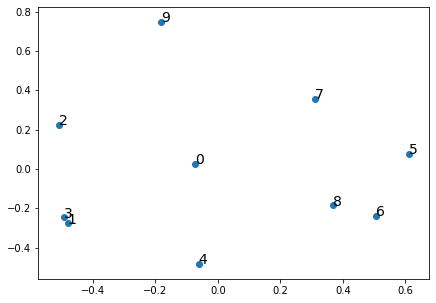

In [46]:
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(7, 5))

#newsgroups_train = fetch_20newsgroups(subset='train', 
           #                           categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(documents).todense()
x=data2D[:, 0]
y=data2D[:, 1]
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
for i in range(10):
    ax.text(x[i], y[i] ,i,size=14)  
plt.show()

In [26]:
terms = vectorizer.get_feature_names()

In [ ]:
print(Y.toarray())


In [244]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
print(dist)
np.where(dist < 0, dist, -np.inf).argmax()

[[ 0.00000000e+00  7.53830308e-01  9.78049599e-01  9.13341585e-01]
 [ 7.53830308e-01  0.00000000e+00  8.68812739e-01  6.24674976e-01]
 [ 9.78049599e-01  8.68812739e-01 -4.44089210e-16  7.31206924e-01]
 [ 9.13341585e-01  6.24674976e-01  7.31206924e-01  0.00000000e+00]]


10

In [252]:
xcord=X[:,0].toarray()
ycord=X[:,1].toarray()

In [250]:
print(Y[:,0].toarray())
print(Y[:,1].toarray())

[[0.28595344]]
[[0.]]


In [114]:
clusters=model.labels_.tolist()

In [258]:
for x in ycord:
    print(x[0])

0.0
0.0
0.34152356283346147
0.0


In [255]:
for x in xcord:
    print(x[0])

0.12316382895960731
0.18438450509260088
0.1782211629753317
0.17624612935804312


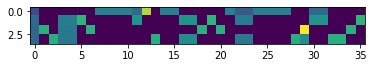

In [80]:
plt.imshow(X.toarray())

IndexError: list index out of range

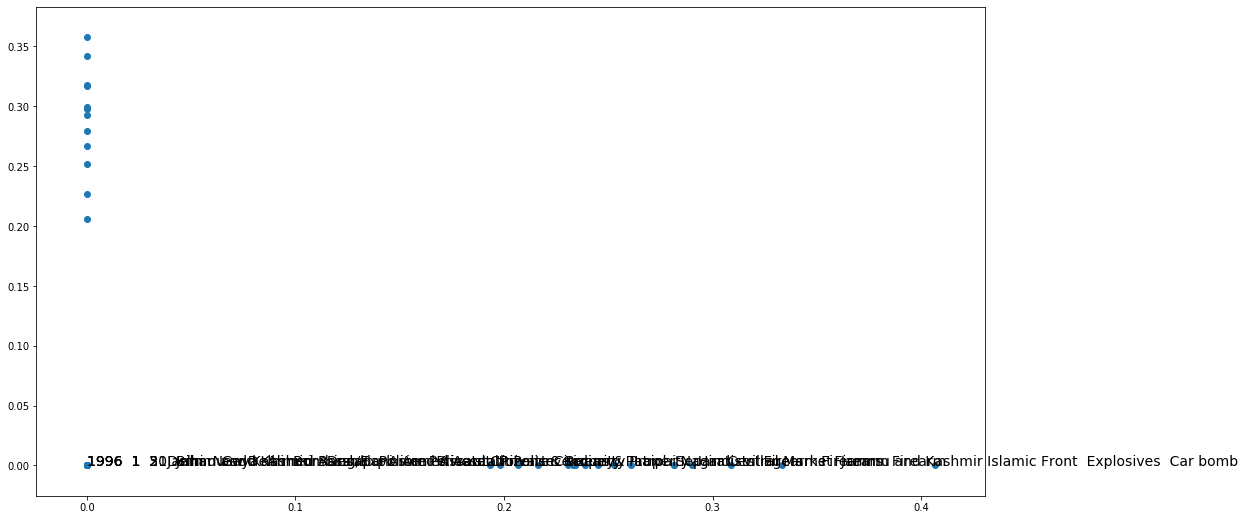

In [308]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05)

plt.scatter(X[:, 0].toarray(), X[:, 1].toarray())
x=X[:, 0].toarray()
y=X[:, 1].toarray()


# df = pd.DataFrame(dict(x=xs, y=ys, label=cluster, title=titles)) 
for i in range(len(x)):
    ax.text(x[i], y[i], titles[i], size=14)  

In [260]:
X.toarray()

array([[0.12316383, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2360177 , 0.2360177 , 0.2360177 ,
        0.2360177 , 0.18607907, 0.47203541, 0.        , 0.2360177 ,
        0.2360177 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2360177 , 0.15064704, 0.15064704, 0.2360177 ,
        0.2360177 , 0.2360177 , 0.2360177 , 0.        , 0.        ,
        0.18607907, 0.18607907, 0.        , 0.        , 0.        ,
        0.        ],
       [0.18438451, 0.        , 0.        , 0.22552872, 0.22552872,
        0.35333432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27857283, 0.        , 0.        , 0.        ,
        0.        , 0.27857283, 0.27857283, 0.        , 0.35333432,
        0.        , 0.        , 0.22552872, 0.22552872, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.27857283, 0.27857283, 0.        , 0.        , 0.        ,
        0.35333432],
      